#### **Welcome to Assignment 2**
This assignment consists of three parts. Part-1 is based on the content you learned in Week-3 of course and Part-2 is based on the content you learned in Week-4 of the course. Part-3 is **un-graded** and mainly designed to help you flex the Deep Learning muscles grown in Part-2. 

Unlike the first two parts, you'll have to implement everything from scratch in Part-3. If you find answers to questions in Part-3, feel free to head out to the forums and discuss them with your classmates!

#### **Instructions**
1. Use Python 3.x to run this notebook
2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'.
you should not change anything else in the code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.
3. Read documentation of each function carefully.
4. All the Best!

# Part-1

In [1]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline 
# uncomment this line if you're running this notebook on your local PC

In [2]:
# DO NOT CHANGE THIS CODE
np.random.seed(10)

### Question 1 : Line detection from a given image.


Find the starting and ending point co-ordinates of detected lines of a given image (line.png) using hough transform.

Following criterion need to be satisfied to qualify as a line:

(a) Minimum line length = 60;
(b) Maximum allowed gap between line segments = 250;
(c) Accumulator threshold parameter = 15  (only those lines are returned that get enough votes);
(d) Distance resolution of the accumulator in pixels = 1;
(e) Angle resolution of the accumulator in radians = pi/180



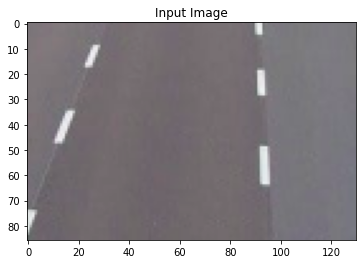

Deteched cordinates of lines are 
[[[ 0 83 25  9]]

 [[92  0 95 64]]

 [[ 1 81 27  9]]

 [[90  0 92 63]]]


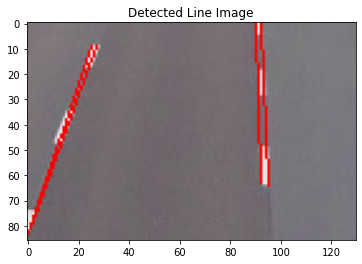

In [3]:
#Read image 
img = cv2.imread('line.png', cv2.IMREAD_COLOR)

# Visualize the input image
plt.imshow(img)
plt.title('Input Image')
plt.show()

#### YOUR CODE STARTS HERE #####
#convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#### YOUR CODE ENDS HERE #####

#Find the edges in the image using canny detector

edges = cv2.Canny(gray, 50, 200)

#### YOUR CODE STARTS HERE #####

lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength=60,maxLineGap=250)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),[255,0,0],1)

print("Deteched cordinates of lines are ")
print(lines)    

#### YOUR CODE ENDS HERE #####
plt.imshow(img)
plt.title('Detected Line Image')
plt.show()

##Question 2: Point matching using RANSAC

Given two sets of points related by affine transformation(with an outlier rate), use the RANSAC method to estimate the Affine transformation parameters between them and the number of inliers(Matching points).

What is the estimated number of inliers for an outlier rate of 0.9?


In [4]:
import numpy as np
np.random.seed(0)


# Affine Transformation
# |x'|  = |a, b| * |x|  +  |tx|
# |y'|    |c, d|   |y|     |ty|
# points_t =    A   * points_s  + t

# -------------------------------------------------------------

class Transform():

    def create_case(self, out_rate):
        ''' CREATE_CASE

            Method to generate a test case for affine transformation

            Input arguments:
            - out_rate : the percentage of outliers in test case

            Outputs:
            - points_s : Source points that will be transformed
            - points_t : warped points
            - A, t : parameters of affine transformation, A is a 2x2
            matrix, t is a 2x1 vector, both of them are created randomly

        '''


        # Generate an affine transformation
        # A is a 2x2 matrix, with values in range -2 to 2
        A = 4 * np.random.rand(2, 2) - 2

        # t is a 2x1 vector, with values in range -10 to 10
        t = 20 * np.random.rand(2, 1) - 10

        # Set the num_points = 1000 for the test case
        num_points = 1000

        #### YOUR CODE STARTS HERE ####
        # Compute the no. of outliers and the no. of inliers respectively
        outliers = int(out_rate*1000)
        inliers = num_points - outliers
        #### YOUR CODE ENDS HERE ####

        # Gernerate source points, with scope from (0,0) to (100, 100)
        points_s = 100 * np.random.rand(2, num_points)

        # Initialization of the warped points matrix
        points_t = np.zeros((2, num_points))
  
        #### YOUR CODE STARTS HERE ####
        # Compute inliers in warped points matrix by applying A and t
        points_t[:, :inliers] = A@points_s[:,:inliers] + t
        #### YOUR CODE ENDS HERE ####

        # Outliers in warped points matrix
        points_t[:, inliers:] = 100 * np.random.rand(2, outliers)

        # Reset the order of warped points matrix
        # outliers and inliers will scatter randomly in test case
        rand_inx = np.random.permutation(num_points)
        points_s = points_s[:, rand_inx]
        points_t = points_t[:, rand_inx]

        return A, t, points_s, points_t

    def affine_transformation(self, points_s, points_t):  
        ''' AFFINE_TRANSFORMATION

            Perform affine transformation

            Input arguments:
            - points_t : points in target image
            - points_s : points in source image

            Outputs:

            - A, t : the affine transformation, A is a 2x2 matrix
            that indicates the rotation and scaling transformation,
            t is a 2x1 vector determines the translation

            Method:

            To estimate an affine transformation between two images,
            at least 3 corresponding points are needed.
            In this case, 6-parameter affine transformation are taken into
            consideration, which is shown as follows:

            | x' | = | a b | * | x | + | tx |
            | y' |   | c d |   | y |   | ty |

            For 3 corresponding points, 6 equations can be formed as below:

            | x1 y1 0  0  1 0 |       | a  |       | x1' |
            | 0  0  x1 y1 0 1 |       | b  |       | y1' |
            | x2 y2 0  0  1 0 |   *   | c  |   =   | x2' |
            | 0  0  x2 y2 0 1 |       | d  |       | y2' |
            | x3 y3 0  0  1 0 |       | tx |       | x3' |
            | 0  0  x3 y3 0 1 |       | ty |       | y3' |

            |------> M <------|   |-> theta <-|   |-> b <-|

            Solve the equation by calculating:  theta = M \ b
            Thus, affine transformation can be obtained as:

            A = | a b |     t = | tx |
                | c d |         | ty |

        '''

        #### YOUR CODE STARTS HERE ####
        b = points_t.T.reshape(-1, 1)
  
        transpose_points_s = np.reshape(np.transpose(points_s),(3,2))

        temp1 = np.vstack((transpose_points_s,np.zeros((3,2))))
        temp1[[1,4]]=temp1[[4,1]]
        temp1[[2,4]]=temp1[[4,2]]

        temp2 = np.vstack((np.zeros((3,2)),transpose_points_s))
        temp2[[1,3]]=temp2[[3,1]]
        temp2[[3,4]]=temp2[[4,3]]

        M = np.hstack((temp1,temp2,np.array([[1],[0],[1],[0],[1],[0]]),np.array([[0],[1],[0],[1],[0],[1]])))

        theta = np.linalg.pinv(M) @ b

        A = np.reshape(theta[:4],(2,2))
        t = np.reshape(theta[4:],(2,1))

        return A,t
        #### YOUR CODE ENDS HERE ####
# -------------------------------------------------------------

# Create instance
tf = Transform()

# Generate a test case as validation with
# a rate of outliers
out_rate = 0.90
A_true, t_true, points_s, points_t = tf.create_case(out_rate)

# At least 3 corresponding points to
# estimate affine transformation
L = 3
# Randomly select 3 pairs of points to do estimation
idx = np.random.randint(0, points_s.shape[1], (L, 1))

A_test, t_test = tf.affine_transformation(points_s[:, idx], points_t[:, idx])

# -------------------------------------------------------------
# Test Class RansacClass
# The number of iterations in RANSAC
ITER_NUM = 2000


class RansacClass():

    def __init__(self, L=3, thr=1): 
        ''' __INIT__

            Initialize the instance.

            Input arguments:

            - L : the number of corresponding points,
            default is 3
            - thr : threshold that determines which points are inliers
            by comparing residual with it

        '''

        self.L = L
        self.thr = thr

    def calculate_distance(self, A, t, points_s, points_t):     
        ''' CALCULATE_DISTANCE

            Compute residual length between estimation and 
            real target points.
 

            Input arguments:

            - A, t : the estimated affine transformation
                     (using least square)
            - points_s : key points taken from source image
            - points_t : key points taken from target image

            Output:

            - residual : Euclidean distance between target 
            points and estimated points. Euclidean distance is
            nothing but the residual length

        '''

        ###YOUR CODE START HERE
        t_test = A @ points_s + t
        distance = np.linalg.norm(t_test-points_t,axis=0)
        return distance
        ###YOUR CODE ENDS HERE

    def apply_ransac(self, points_s, points_t):
        ''' APPLY_RANSAC

            Use this method to get the estimateda ffine 
            transformation, also inliers.

            Input arguments:

            - points_s : key points from source image
            - points_t : key points from target image

            Output:

            - A, t : estimated affine transformation
            - inliers : indices of inliers 

        '''
        #### YOUR CODE START HERE
        A_final = np.zeros((2,2))
        t_final = np.zeros((2,1))
        maximum_inliers=0
        
        for _ in range(ITER_NUM):
          indices = np.random.choice(points_s.shape[1],(self.L,1))
          A_test,t_test = tf.affine_transformation(points_s[:,indices],points_t[:,indices])
          dist = self.calculate_distance(A_test,t_test,points_s,points_t)
          inliners = (dist<self.thr).sum()
          if inliners > maximum_inliers:
            maximum_inliers = inliners
            A_final = A_test
            t_final = t_test
            inlier_index = np.argwhere(dist<self.thr).reshape(1,-1)
        return A_final,t_final,inlier_index
        #### YOUR CODE ENDS HERE
# -------------------------------------------------------------

# Create instance
rs = RansacClass(L=3, thr=1)

residual = rs.calculate_distance(A_test, t_test, points_s, points_t)
A_rsc, t_rsc, inliers = rs.apply_ransac(points_s, points_t)

# print the number of inliners or point matches
print(inliers[0].shape)


(101,)


### Question 3: Detect corners in a given image using Harris Corner Detection Algorithm

Find the number of detected corner points in a given image (line.png) using Harris Corner Detection Algorithm. Note that, Following criterion MUST be satisfied while applying Harris Corner detection Algorithm:

(a)  The size of neighbourhood considered for corner detection = 2.
(b)  Aperture parameter of Sobel derivative used = 3.
(c)  Harris detector free parameter in the equation = 0.04.

How many corners are detected?



Number of corners detected are -  222


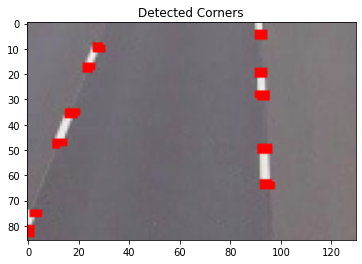

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('line.png')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

###YOUR CODE STARTS HERE

## STEP 1:  Convert to grayscale 
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
## STEP 2: Detect corners 
corners = cv2.cornerHarris(gray,2,3,0.04)
## STEP 3: Dilate corner image to enhance corner points
corners = cv2.dilate(corners,None)
## STEP 4:set threshold value as 0.1 * (maximum value of dilated corner image obtained from STEP3)
threshold = 0.1*corners.max()
## STEP 5: Count numer of detected corner points and draw them on the image
print("Number of corners detected are - ",(corners>threshold).sum())
image_copy[corners > threshold] = [255,0,0]
plt.imshow(image_copy)
plt.title('Detected Corners')
plt.show()

### YOUR CODE ENDS HERE

# Part-2

In this section, we will train a neural network to learn to identify numerals from [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Fill out the missing pieces in each of the following cells. 

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import timeit
import unittest

## Please DONOT remove these lines. 
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)

### Data Loading and Pre-processing

In [7]:
# check availability of GPU and set the device accordingly
#### YOUR CODE STARTS HERE ####
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
# define a transforms for preparing the dataset
to_tensor = transforms.ToTensor()
normalise = transforms.Normalize(mean= (0.1307,),std= (0.5,))
transform = transforms.Compose([to_tensor,normalise,])
         # convert the image to a pytorch tensor
        # normalise the images with mean (0.1307) and std (0.3081) of the dataset
#### YOUR CODE ENDS HERE ####

In [8]:
# Load the MNIST training, test datasets using `torchvision.datasets.MNIST` using the transform defined above
#### YOUR CODE STARTS HERE ####
train_dataset = datasets.MNIST('./MNIST',train=True,download=True,transform=transform)
test_dataset = datasets.MNIST('./MNIST',train=False,download=True,transform=transform)
#### YOUR CODE ENDS HERE ####

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw




Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
# create dataloaders for training and test datasets
# use a batch size of 32 and set shuffle=True for the training set
#### YOUR CODE STARTS HERE ####
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)
#### YOUR CODE ENDS HERE ####

### Network Definition

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #### YOUR CODE STARTS HERE ####
        # define a conv layer with output channels as 16, kernel size of 3 and stride of 1
        self.conv1 = nn.Conv2d(1,16,kernel_size=3,stride=1)
        # define a conv layer with output channels as 32, kernel size of 3 and stride of 1
        self.conv2 = nn.Conv2d(16,32,kernel_size=3,stride=1)
        # define a conv layer with output channels as 64, kernel size of 3 and stride of 1
        self.conv3 = nn.Conv2d(32,64,kernel_size=3,stride=1)
        # define a max pooling layer with kernel size 2
        self.maxpool1 = nn.MaxPool2d(2,2)
        # define dropout layer with a probability of 0.25
        self.drop1 = nn.Dropout2d(p=0.25)
        # define dropout layer with a probability of 0.5
        self.drop2 = nn.Dropout(p=0.5)
        # define a linear(dense) layer with 128 output features
        self.fc1 = nn.Linear(64*11*11,128)
        # define a linear(dense) layer with output features corresponding to the number of classes in the dataset
        self.fc2 = nn.Linear(128,10)
        #### YOUR CODE ENDS HERE ####

    def forward(self, x):
        # Use the layers defined above in a sequential way (folow the same as the layer definitions above) and 
        # write the forward pass, after each of conv1, conv2, conv3 and fc1 use a relu activation. 
        # use the first dropout after maxpool and the other one before you final FC layer
        #### YOUR CODE STARTS HERE ####
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.maxpool1(self.conv3(x)))
        x = self.drop1(x)
        x = x.view(-1,64*11*11)
        x = F.relu(self.fc1(x))
        x = self.drop2(x)
        out = self.fc2(x)      
        #### YOUR CODE ENDS HERE ####
        output = F.log_softmax(out, dim=1)
        return output

### Sanity Check
Make sure all the tests below pass without any errors, before you proceed with the training part.

In [11]:
import unittest

class TestImplementations(unittest.TestCase):
    
    # Dataloading tests
    def test_dataset(self):
        self.dataset_classes = ['0 - zero',
                                '1 - one',
                                '2 - two',
                                '3 - three',
                                '4 - four',
                                '5 - five',
                                '6 - six',
                                '7 - seven',
                                '8 - eight',
                                '9 - nine']
        self.assertTrue(train_dataset.classes == self.dataset_classes)
        self.assertTrue(train_dataset.train == True)
    
    def test_dataloader(self):        
        self.assertTrue(train_dataloader.batch_size == 32)
        self.assertTrue(test_dataloader.batch_size == 32)      
         
    def test_total_parameters(self):
        model = Net().to(device)
        print(sum(p.numel() for p in model.parameters()))
        self.assertTrue(sum(p.numel() for p in model.parameters()) == 1015946)

suite = unittest.TestLoader().loadTestsFromModule(TestImplementations())
unittest.TextTestRunner().run(suite)

...

1015946



----------------------------------------------------------------------
Ran 3 tests in 8.264s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

### Training and Inference

In [12]:
import matplotlib.pyplot as plt

def plotting(epochs,train_loss_values,train_acc_values,test_loss_values,test_acc_values): 
    plt.plot(epochs,train_loss_values,'r-',label='train')
    plt.plot(epochs,test_loss_values,'b-',label='test')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Part')
    plt.legend()
    plt.show()
    print('')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Part')
    plt.plot(epochs,train_acc_values,'r-',label='Train Accuracy')
    plt.plot(epochs,test_acc_values,'b-',label='Test Accuracy')
    plt.legend()
    plt.show()    

In [13]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    loss_epoch = []
    train_acc = 0
    for batch_idx, (data, target) in enumerate(train_loader):
      #### YOUR CODE STARTS HERE ####
        # send the image, target to the device
        data = data.to(device)
        target = target.to(device)
        # flush out the gradients stored in optimizer
        optimizer.zero_grad()
        # pass the image to the model and assign the output to variable named output
        output = model(data)
        # calculate the loss (use nll_loss in pytorch)
        _, pred = torch.max(output.data, 1)
        train_acc+=(pred.eq(target.view_as(pred)).sum().item())
        loss = F.nll_loss(output,target)
        # do a backward pass
        loss.backward()
        
        loss_epoch.append(loss.item())
        # update the weights
        optimizer.step()
      #### YOUR CODE ENDS HERE ####
        if batch_idx % 20 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    return sum(loss_epoch)/len(loss_epoch),100. * train_acc / len(train_loader.dataset)

In [14]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
          ### YOUR CODE STARTS HERE ####
            # send the image, target to the device
            data = data.to(device)
            target = target.to(device)
            # pass the image to the model and assign the output to variable named output
            output = model(data)

            loss = F.nll_loss(output,target)
            test_loss += loss.item()    # sum up batch loss
            _, pred = torch.max(output.data, 1)
          #### YOUR CODE ENDS HERE ####
            # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss, 100. * correct / len(test_loader.dataset)

### Question 4

Use Adam as the optimiser and train the model for 25 epochs. Report the train, test loss and accuracies along with the total time taken for training. (Use plots if required)

**After training the model these are the reported values :**


- Test loss : 0.0027
- Test accuracy : 9786/10000 - 98%
- Time taken : 1054.14 seconds

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.305786
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.208473
Train Epoch: 0 [1280/60000 (2%)]	Loss: 1.360750
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.511556
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.678856
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.567624
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.524801
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.739694
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.500189
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.457226
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.777385
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.258101
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.467662
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.595440
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.250372
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.299167
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.416576
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.210681
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.489630
Train Epoch: 0 [12160/60000 (20%)]	Loss: 1.008725
Train Epoch: 0 [12800/60000 (

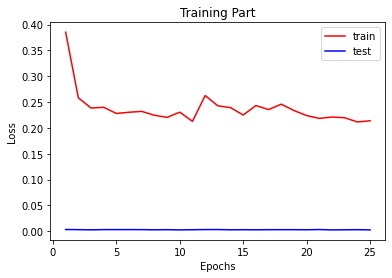

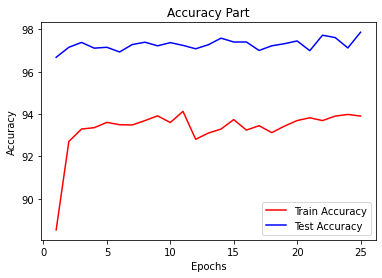

In [15]:
import time

model = Net().to(device)
EPOCHS = 25
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
train_loss_values =  []
train_acc_values = []
test_loss_values =  []
test_acc_values = []

start = time.time()

for epoch in range(EPOCHS):
    current_train_loss,current_train_acc = train(model,device,train_dataloader,optimizer,epoch)
    train_loss_values.append(current_train_loss)
    train_acc_values.append(current_train_acc)
    current_test_loss,current_test_acc  = test(model,device,test_dataloader)
    test_loss_values.append(current_test_loss)
    test_acc_values.append(current_test_acc)    


end = time.time()
print('Time taken to train the model is : {:.2f} seconds'.format(end-start))

plotting(np.linspace(1, EPOCHS, EPOCHS).astype(int),train_loss_values,train_acc_values,test_loss_values,test_acc_values)

### Question 5

Modify the network defined in the previous step to replace ReLU activations with Sigmoid and report the final test accuracy. Is there a drop in accuracy, what do you think is the reason? 

### Explanation :
- Test accuracy : 974/10000 - 10%
- Test loss : 0.0751
- Time taken : 1060.36 seconds

Yes, there is a significant drop in accuracy of sigmoid model compared to relu model. The sigmoid function always outputs value between 0 and 1, large changes in values causes only a minute change in the output. As a result the derivates of them is small. When the inputs of the are too high or too low, the derivate of the sigmoid reaches to zero. During back propogation, the gradient is multiplied n times to get the gradients of the inner layers. The effect of multiplying the gradient n times makes the gradient much smaller for the lower layers, resulting in a very slight change or even no improvement in the weights of the lower layers. Therefore, the deeper the network, the more the influence of the gradients disappears. This is known as **Vanishing gradient problem**.

In [16]:
class Net_Sigmoid(nn.Module):
    def __init__(self):
        super(Net_Sigmoid, self).__init__()
        #### YOUR CODE STARTS HERE ####
        # define a conv layer with output channels as 16, kernel size of 3 and stride of 1
        self.conv1 = nn.Conv2d(1,16,kernel_size=3,stride=1)
        # define a conv layer with output channels as 32, kernel size of 3 and stride of 1
        self.conv2 = nn.Conv2d(16,32,kernel_size=3,stride=1)
        # define a conv layer with output channels as 64, kernel size of 3 and stride of 1
        self.conv3 = nn.Conv2d(32,64,kernel_size=3,stride=1)
        # define a max pooling layer with kernel size 2
        self.maxpool1 = nn.MaxPool2d(2,2)
        # define dropout layer with a probability of 0.25
        self.drop1 = nn.Dropout2d(p=0.25)
        # define dropout layer with a probability of 0.5
        self.drop2 = nn.Dropout(p=0.5)
        # define a linear(dense) layer with 128 output features
        self.fc1 = nn.Linear(64*11*11,128)
        # define a linear(dense) layer with output features corresponding to the number of classes in the dataset
        self.fc2 = nn.Linear(128,10)
        #### YOUR CODE ENDS HERE ####

    def forward(self, x):
        # Use the layers defined above in a sequential way (folow the same as the layer definitions above) and 
        # write the forward pass, after each of conv1, conv2, conv3 and fc1 use a relu activation. 
        # use the first dropout after maxpool and the other one before you final FC layer
        #### YOUR CODE STARTS HERE ####
        x = torch.sigmoid(self.conv1(x))
        x = torch.sigmoid(self.conv2(x))
        x = torch.sigmoid(self.maxpool1(self.conv3(x)))
        x = self.drop1(x)
        x = x.view(-1,64*11*11)
        x = torch.sigmoid(self.fc1(x))
        x = self.drop2(x)
        out = self.fc2(x)      
        #### YOUR CODE ENDS HERE ####
        output = F.log_softmax(out, dim=1)
        return output

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.364960
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.488918
Train Epoch: 0 [1280/60000 (2%)]	Loss: 2.385104
Train Epoch: 0 [1920/60000 (3%)]	Loss: 2.491121
Train Epoch: 0 [2560/60000 (4%)]	Loss: 2.508512
Train Epoch: 0 [3200/60000 (5%)]	Loss: 2.352593
Train Epoch: 0 [3840/60000 (6%)]	Loss: 2.392869
Train Epoch: 0 [4480/60000 (7%)]	Loss: 2.289293
Train Epoch: 0 [5120/60000 (9%)]	Loss: 2.429082
Train Epoch: 0 [5760/60000 (10%)]	Loss: 2.383789
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.394881
Train Epoch: 0 [7040/60000 (12%)]	Loss: 2.362334
Train Epoch: 0 [7680/60000 (13%)]	Loss: 2.411967
Train Epoch: 0 [8320/60000 (14%)]	Loss: 2.405924
Train Epoch: 0 [8960/60000 (15%)]	Loss: 2.321372
Train Epoch: 0 [9600/60000 (16%)]	Loss: 2.255144
Train Epoch: 0 [10240/60000 (17%)]	Loss: 2.464723
Train Epoch: 0 [10880/60000 (18%)]	Loss: 2.340474
Train Epoch: 0 [11520/60000 (19%)]	Loss: 2.373259
Train Epoch: 0 [12160/60000 (20%)]	Loss: 2.446916
Train Epoch: 0 [12800/60000 (

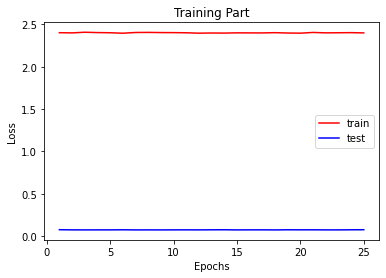

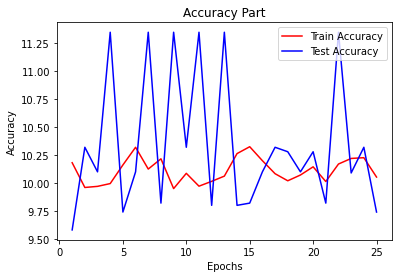

In [17]:
import time

model_sigmoid = Net_Sigmoid().to(device)
EPOCHS = 25
optimizer = torch.optim.Adam(model_sigmoid.parameters(),lr=0.01)
train_loss_values =  []
train_acc_values = []
test_loss_values =  []
test_acc_values = []

start = time.time()

for epoch in range(EPOCHS):
    current_train_loss,current_train_acc = train(model_sigmoid,device,train_dataloader,optimizer,epoch)
    train_loss_values.append(current_train_loss)
    train_acc_values.append(current_train_acc)
    current_test_loss,current_test_acc  = test(model_sigmoid,device,test_dataloader)
    test_loss_values.append(current_test_loss)
    test_acc_values.append(current_test_acc)    


end = time.time()
print('Time taken to train the model is : {:.2f} seconds'.format(end-start))

plotting(np.linspace(1, EPOCHS, EPOCHS).astype(int),train_loss_values,train_acc_values,test_loss_values,test_acc_values)

### Question 6

Train the network defined in Question-1 with a different optimiser other than Adam, do you see any difference in performance? Substantiate your observations with relevant explanations.

### Explanation :
Here I trained the model with SGD optimizer. SGD is a variant of the gradient descent. It doesn't perform computations on the entire dataset which is redundant and inefficient. It instead computes on a small subset or random selection of data points. It is found that SGD is more locally unstable and is more likely to converge to the minima at the flat or asymmetric valleys which often have better generalization performance over other type minima. But by looking at both the loss graphs we can say that, SGD generalizes much better than ADAM.



Train Epoch: 0 [0/60000 (0%)]	Loss: 2.301255
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.279214
Train Epoch: 0 [1280/60000 (2%)]	Loss: 2.294370
Train Epoch: 0 [1920/60000 (3%)]	Loss: 2.282170
Train Epoch: 0 [2560/60000 (4%)]	Loss: 2.250161
Train Epoch: 0 [3200/60000 (5%)]	Loss: 2.233883
Train Epoch: 0 [3840/60000 (6%)]	Loss: 2.205975
Train Epoch: 0 [4480/60000 (7%)]	Loss: 1.919505
Train Epoch: 0 [5120/60000 (9%)]	Loss: 1.652899
Train Epoch: 0 [5760/60000 (10%)]	Loss: 1.067961
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.131421
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.835992
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.877204
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.720024
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.733649
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.959977
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.685725
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.487958
Train Epoch: 0 [11520/60000 (19%)]	Loss: 1.000056
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.704366
Train Epoch: 0 [12800/60000 (

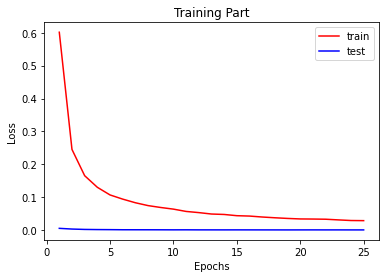

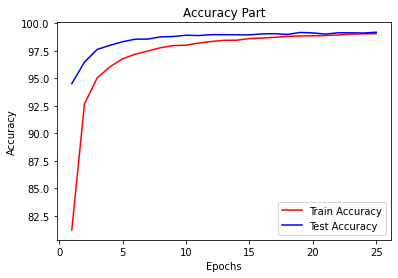

In [18]:
import time

model_sgd = Net().to(device)
EPOCHS = 25
optimizer = torch.optim.SGD(model_sgd.parameters(),lr=0.01)

train_loss_values =  []
train_acc_values = []
test_loss_values =  []
test_acc_values = []

start = time.time()

for epoch in range(EPOCHS):
    current_train_loss,current_train_acc = train(model_sgd,device,train_dataloader,optimizer,epoch)
    train_loss_values.append(current_train_loss)
    train_acc_values.append(current_train_acc)
    current_test_loss,current_test_acc  = test(model_sgd,device,test_dataloader)
    test_loss_values.append(current_test_loss)
    test_acc_values.append(current_test_acc)    


end = time.time()
print('Time taken to train the model is : {:.2f} seconds'.format(end-start))

plotting(np.linspace(1, EPOCHS, EPOCHS).astype(int),train_loss_values,train_acc_values,test_loss_values,test_acc_values)

### Question 7

Initialize the `Conv2d` layers in the network defined in Question-1 `(Net)` with all ones (both weights and bias). Train the network with Adam optimizer and report the final test accuracy. Is there any difference in the performance? If yes, what do you think is the reason? 

### Explanation :
- Test accuracy : 11%
- Test loss : 0.0720
- Time taken : 1051.42 seconds

There is a significant decrease in the accuracy. The main reason for this to happen is that all the weights, bias have the same values i.e:1 in this case; So all of them will have the same sort of influence on the overall cost. It leads to same gradients. As a result the model will train symmetrically affecting the performance.

In [19]:
def init_weights(layer):         # Function that initialises a layer that is passed with 1's in weights and bias
    if type(layer) == nn.Conv2d:
        torch.nn.init.constant_(layer.weight,1)             
        torch.nn.init.constant_(layer.bias,1)             

Train Epoch: 0 [0/60000 (0%)]	Loss: 139030.859375
Train Epoch: 0 [640/60000 (1%)]	Loss: 92269.164062
Train Epoch: 0 [1280/60000 (2%)]	Loss: 2.239403
Train Epoch: 0 [1920/60000 (3%)]	Loss: 2.309991
Train Epoch: 0 [2560/60000 (4%)]	Loss: 2.306317
Train Epoch: 0 [3200/60000 (5%)]	Loss: 2.289921
Train Epoch: 0 [3840/60000 (6%)]	Loss: 2.312392
Train Epoch: 0 [4480/60000 (7%)]	Loss: 2.299304
Train Epoch: 0 [5120/60000 (9%)]	Loss: 2.328549
Train Epoch: 0 [5760/60000 (10%)]	Loss: 2.231938
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.296718
Train Epoch: 0 [7040/60000 (12%)]	Loss: 2.295243
Train Epoch: 0 [7680/60000 (13%)]	Loss: 2.307611
Train Epoch: 0 [8320/60000 (14%)]	Loss: 2.301816
Train Epoch: 0 [8960/60000 (15%)]	Loss: 2.289214
Train Epoch: 0 [9600/60000 (16%)]	Loss: 2.306632
Train Epoch: 0 [10240/60000 (17%)]	Loss: 2.311552
Train Epoch: 0 [10880/60000 (18%)]	Loss: 2.313784
Train Epoch: 0 [11520/60000 (19%)]	Loss: 2.312962
Train Epoch: 0 [12160/60000 (20%)]	Loss: 2.300836
Train Epoch: 0 [1280

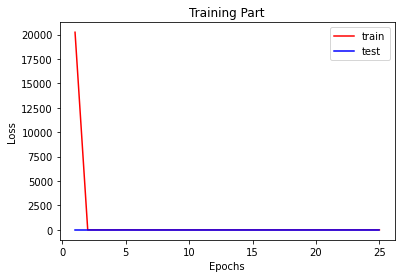

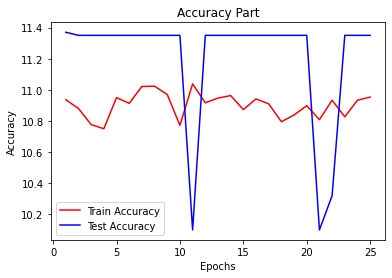

In [20]:
import time

model_ones = Net().to(device)
model_ones.apply(init_weights)

EPOCHS = 25
optimizer = torch.optim.Adam(model_ones.parameters(),lr=0.01)
train_loss_values =  []
train_acc_values = []
test_loss_values =  []
test_acc_values = []

start = time.time()

for epoch in range(EPOCHS):
    current_train_loss,current_train_acc = train(model_ones,device,train_dataloader,optimizer,epoch)
    train_loss_values.append(current_train_loss)
    train_acc_values.append(current_train_acc)
    current_test_loss,current_test_acc  = test(model_ones,device,test_dataloader)
    test_loss_values.append(current_test_loss)
    test_acc_values.append(current_test_acc)    


end = time.time()
print('Time taken to train the model is : {:.2f} seconds'.format(end-start))

plotting(np.linspace(1, EPOCHS, EPOCHS).astype(int),train_loss_values,train_acc_values,test_loss_values,test_acc_values)

### Question 8

Initialize the network defined in Question-1 `(Net)` with Xavier's initialization ([torch.nn.init.xavier_normal](https://pytorch.org/docs/stable/nn.init.html))(for bias use zero). Train the network with Adam optimizer and report the final test accuracy.

- Test accuracy : 9719/1000 - 99%
- Test loss : 0.0030
- Time taken : 1049.17 seconds


In [21]:
def init_weights_all(layer):         # Function that initialises a layer that is passed with Xavier's initialisation
    if type(layer)==nn.Conv2d or type(layer)==nn.Linear:
        torch.nn.init.xavier_normal_(layer.weight)             
        torch.nn.init.zeros_(layer.bias)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.318273
Train Epoch: 0 [640/60000 (1%)]	Loss: 1.332682
Train Epoch: 0 [1280/60000 (2%)]	Loss: 0.735894
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.955391
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.609978
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.548586
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.782972
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.743600
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.322653
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.312227
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.588298
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.376159
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.563449
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.458012
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.422942
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.209816
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.263543
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.206601
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.090768
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.335578
Train Epoch: 0 [12800/60000 (

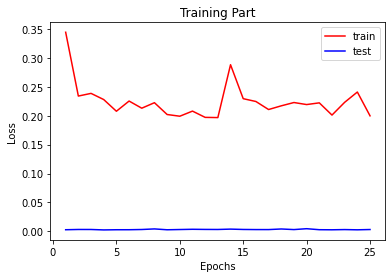

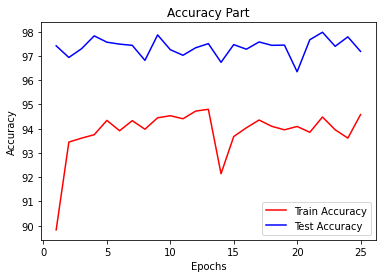

In [22]:
import time

model_xavier = Net().to(device)
model_xavier.apply(init_weights_all)

EPOCHS = 25
optimizer = torch.optim.Adam(model_xavier.parameters(),lr=0.01)
train_loss_values =  []
train_acc_values = []
test_loss_values =  []
test_acc_values = []

start = time.time()

for epoch in range(EPOCHS):
    current_train_loss,current_train_acc = train(model_xavier,device,train_dataloader,optimizer,epoch)
    train_loss_values.append(current_train_loss)
    train_acc_values.append(current_train_acc)
    current_test_loss,current_test_acc  = test(model_xavier,device,test_dataloader)
    test_loss_values.append(current_test_loss)
    test_acc_values.append(current_test_acc)    


end = time.time()
print('Time taken to train the model is : {:.2f} seconds'.format(end-start))

plotting(np.linspace(1, EPOCHS, EPOCHS).astype(int),train_loss_values,train_acc_values,test_loss_values,test_acc_values)

### Question 9

Add three batch-norm layers to the network defined in `Question-1` and report the final test accuracy. How does batch-norm help? 

- Test accuracy : 9863/1000 - 99%
- Test loss : 0.0018
- Time taken : 1145.74 seconds

The best classification is observed in batch-norm.

Bath-norm will help in the following ways :
- Trains faster
- Use higher learning rates.
- Helps in reducing generalization error.
- It adds noise which reduces overfitting with a regularization effect. 
- It win't get stuck in the saturation mode.

In [23]:
class Net_BN(nn.Module):
    def __init__(self):
        super(Net_BN, self).__init__()
        #### YOUR CODE STARTS HERE ####
        # define a conv layer with output channels as 16, kernel size of 3 and stride of 1
        self.conv1 = nn.Conv2d(1,16,kernel_size=3,stride=1)
        self.bn1 = nn.BatchNorm2d(16)
        # define a conv layer with output channels as 32, kernel size of 3 and stride of 1
        self.conv2 = nn.Conv2d(16,32,kernel_size=3,stride=1)
        self.bn2 = nn.BatchNorm2d(32)
        # define a conv layer with output channels as 64, kernel size of 3 and stride of 1
        self.conv3 = nn.Conv2d(32,64,kernel_size=3,stride=1)
        self.bn3 = nn.BatchNorm2d(64)
        # define a max pooling layer with kernel size 2
        self.maxpool1 = nn.MaxPool2d(2,2)
        # define dropout layer with a probability of 0.25
        self.drop1 = nn.Dropout2d(p=0.25)
        # define dropout layer with a probability of 0.5
        self.drop2 = nn.Dropout(p=0.5)
        # define a linear(dense) layer with 128 output features
        self.fc1 = nn.Linear(64*11*11,128)
        # define a linear(dense) layer with output features corresponding to the number of classes in the dataset
        self.fc2 = nn.Linear(128,10)
        #### YOUR CODE ENDS HERE ####

    def forward(self, x):
        # Use the layers defined above in a sequential way (folow the same as the layer definitions above) and 
        # write the forward pass, after each of conv1, conv2, conv3 and fc1 use a relu activation. 
        # use the first dropout after maxpool and the other one before you final FC layer
        #### YOUR CODE STARTS HERE ####
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.maxpool1(self.bn3(self.conv3(x))))
        x = self.drop1(x)
        x = x.view(-1,64*11*11)
        x = F.relu(self.fc1(x))
        x = self.drop2(x)
        out = self.fc2(x)      
        #### YOUR CODE ENDS HERE ####
        output = F.log_softmax(out, dim=1)
        return output

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.420225
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.195933
Train Epoch: 0 [1280/60000 (2%)]	Loss: 2.390139
Train Epoch: 0 [1920/60000 (3%)]	Loss: 2.007521
Train Epoch: 0 [2560/60000 (4%)]	Loss: 1.893959
Train Epoch: 0 [3200/60000 (5%)]	Loss: 1.961479
Train Epoch: 0 [3840/60000 (6%)]	Loss: 1.887401
Train Epoch: 0 [4480/60000 (7%)]	Loss: 1.949434
Train Epoch: 0 [5120/60000 (9%)]	Loss: 1.882384
Train Epoch: 0 [5760/60000 (10%)]	Loss: 1.712076
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.547417
Train Epoch: 0 [7040/60000 (12%)]	Loss: 1.976664
Train Epoch: 0 [7680/60000 (13%)]	Loss: 1.370707
Train Epoch: 0 [8320/60000 (14%)]	Loss: 1.788026
Train Epoch: 0 [8960/60000 (15%)]	Loss: 1.664153
Train Epoch: 0 [9600/60000 (16%)]	Loss: 1.467135
Train Epoch: 0 [10240/60000 (17%)]	Loss: 1.769107
Train Epoch: 0 [10880/60000 (18%)]	Loss: 1.483968
Train Epoch: 0 [11520/60000 (19%)]	Loss: 1.700342
Train Epoch: 0 [12160/60000 (20%)]	Loss: 1.569333
Train Epoch: 0 [12800/60000 (

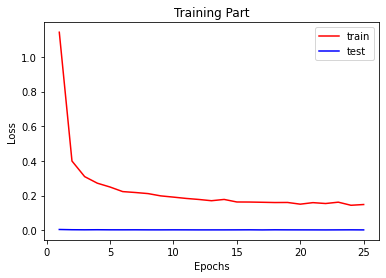

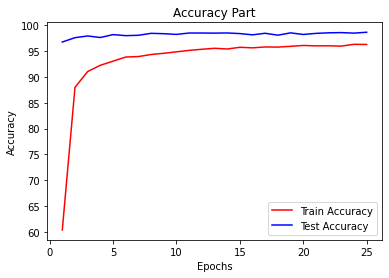

In [24]:
import time

model_bn = Net_BN().to(device)
EPOCHS = 25
optimizer = torch.optim.Adam(model_bn.parameters(),lr=0.01)
train_loss_values =  []
train_acc_values = []
test_loss_values =  []
test_acc_values = []

start = time.time()

for epoch in range(EPOCHS):
    current_train_loss,current_train_acc = train(model_bn,device,train_dataloader,optimizer,epoch)
    train_loss_values.append(current_train_loss)
    train_acc_values.append(current_train_acc)
    current_test_loss,current_test_acc  = test(model_bn,device,test_dataloader)
    test_loss_values.append(current_test_loss)
    test_acc_values.append(current_test_acc)    


end = time.time()
print('Time taken to train the model is : {:.2f} seconds'.format(end-start))

plotting(np.linspace(1, EPOCHS, EPOCHS).astype(int),train_loss_values,train_acc_values,test_loss_values,test_acc_values)

# Part-3 (Optional)

This section is un-graded and purely for practice. 

Main focus of this part is to help you flex the deep learning muscles built in the above part. You should build a network on the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This dataset is similar to MNIST but unlike MNIST, the images are colored and more complex. 

As of writing this, the state-of-the-art(SoTA) performance on this dataset is 98.98%. You can try to start with the simple network we defined above for the MNSIT dataset(with some modification for dealing with different sized colored images unlike MNIST). But to achive the SoTA performance you need to do a lot of hackery. These are list of few things, we would encourage you to try: 

- Use data augmentation wisely. Read and understand how to perform the augmentations listed below. 
    * RandomFlips, Color Jittering
    * Cutout, Cutmix
    * Mixup
    * Auto-augment

- Try to increase the image size using standard image interpolation techniques. Try using tricks like Progressive resizing of images and see if it helps. 

- After certain number of layers, adding more layer might not be of much help, run experiments on SVHN and see if you observe this. 

- To understand the difficulties in training deeper networks read this paper: [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)

- To improve the performance on SVHN, try using architectures like [ResNet](https://arxiv.org/abs/1512.03385), [DesnseNet](https://arxiv.org/abs/1608.06993) or [EfficientNet](https://arxiv.org/abs/1905.11946). Most of these architectures are available by default in PyTorch.
